# Red Wine Quality Prediction

## Data Preparation

In [99]:
# import data from csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

# import data
df = pd.read_csv('winequality-red.csv')

In [100]:
print(df.shape)
(df.head())

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [119]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop('quality', axis=1)
y = df['quality']
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, _y_train, _y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# IF y>6.5, y=1, else y=0
y_train = np.where(_y_train>6.5, 1, 0)
y_test = np.where(_y_test>6.5, 1, 0)

In [133]:
y_pred==y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

<AxesSubplot:>

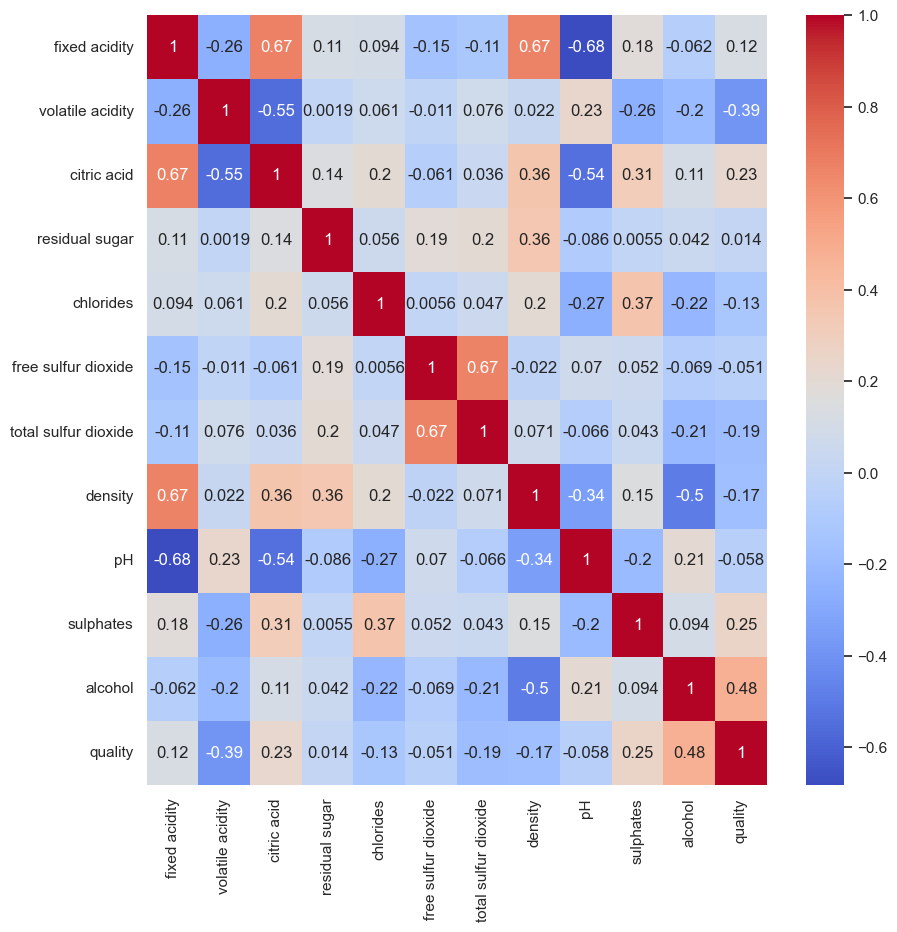

In [120]:
# plot correlation matrix
corr = df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [121]:
# collect x_train data by y_train
_x_train = pd.DataFrame(X_train)
_x_train['quality'] = _y_train
# group by quality
stats = _x_train.groupby('quality').mean()
stats

,0,1,2,3,4,5,6,7,8,9,10
quality,,,,,,,,,,,
3.0,-0.287057,0.213289,-0.764997,0.511672,0.189869,0.528367,0.095247,0.163944,0.226041,0.058135,0.128614
4.0,-0.040009,-0.041224,-0.024644,-0.004578,-0.052423,-0.021791,-0.137650,-0.160362,0.011844,-0.164379,0.087478
5.0,-0.033084,0.041542,-0.045357,-0.049940,0.019498,-0.042792,-0.048707,-0.032584,0.029522,0.016720,0.017677
6.0,0.052374,-0.000893,0.098219,0.072780,0.036307,-0.034625,0.017474,0.090609,-0.045855,0.047485,-0.009589
7.0,0.003706,-0.053202,0.106622,-0.033444,0.025199,0.185205,0.090443,-0.070560,0.064623,-0.029701,0.041345
8.0,0.140185,0.403229,-0.406477,0.101464,-0.023441,0.420566,0.585661,0.475400,-0.095566,-0.064183,-0.559177


In [122]:
# # plot Radar Chart of 6 quality of wine
# df_train = pd.DataFrame(X_train, columns=df.columns[:-1])
# plt.figure(figsize=(5,5))
# labels = np.array(df_train.columns)
# stats = df_train.mean()
# angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# # stats = np.concatenate((stats,[stats[0]]))
# # angles = np.concatenate((angles,[angles[0]]))
# fig = plt.figure()
# ax = fig.add_subplot(111, polar=True)
# ax.plot(angles, stats, 'o-', linewidth=2)
# ax.fill(angles, stats, alpha=0.25)
# ax.set_thetagrids(angles * 180/np.pi, labels)
# ax.set_title("Wine Quality")
# ax.grid(True)





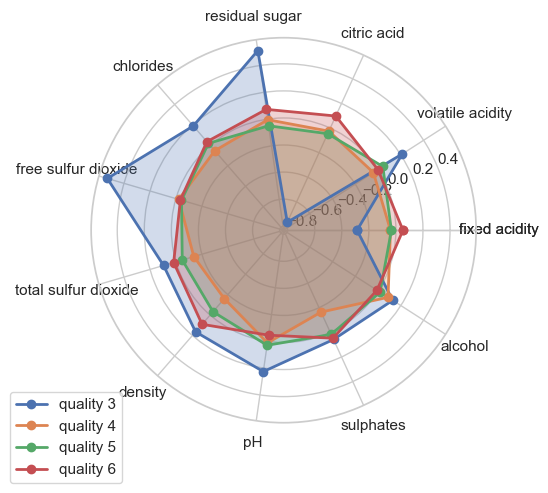

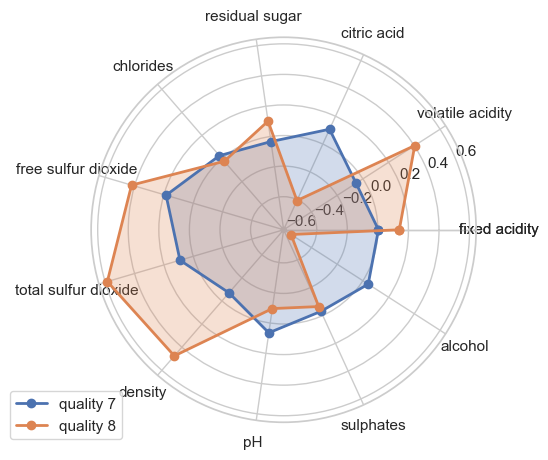

In [124]:
import plotly.express as px
# plot Radar Chart of 6 quality of wine
labels = np.array(df.columns[:-1])
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))
labels = np.concatenate((labels,[labels[0]]))
def radar_chart(stats, labels, angles):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, polar=True)
    # for i in range(len(stats)):
    #     stats_i = np.concatenate((stats.iloc[i],[stats.iloc[i][0]]))
    #     ax.plot(angles, stats_i, 'o-', linewidth=2, label='quality '+str(i+3))
    #     ax.fill(angles, stats_i, alpha=0.25)
    # plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    # plt.show()

    # plot first 4 rows
    for i in range(4):
        stats_i = np.concatenate((stats.iloc[i],[stats.iloc[i][0]]))
        ax.plot(angles, stats_i, 'o-', linewidth=2, label='quality '+str(i+3))
        ax.fill(angles, stats_i, alpha=0.25)
        # fill in labels
        ax.set_thetagrids(angles * 180/np.pi, labels)
    
    # show plot
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    # new plot 3-6 rows
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, polar=True)
    
    for i in range(4,6):
        stats_i = np.concatenate((stats.iloc[i],[stats.iloc[i][0]]))
        ax.plot(angles, stats_i, 'o-', linewidth=2, label='quality '+str(i+3))
        ax.fill(angles, stats_i, alpha=0.25)
        # fill in labels
        ax.set_thetagrids(angles * 180/np.pi, labels)
    
    # show plot
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

radar_chart(stats, labels, angles)

In [125]:
# how many unique values in quality
n_quality = df['quality'].unique().__len__()
print(n_quality)

6


### Try Logistic Regression

<AxesSubplot:>

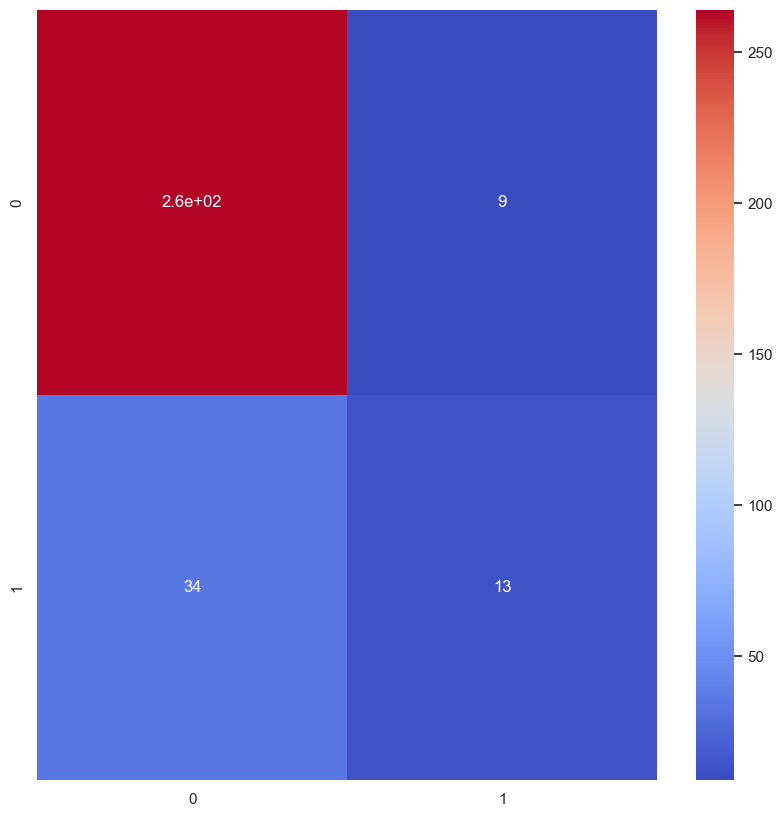

In [127]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='coolwarm')

<AxesSubplot:>

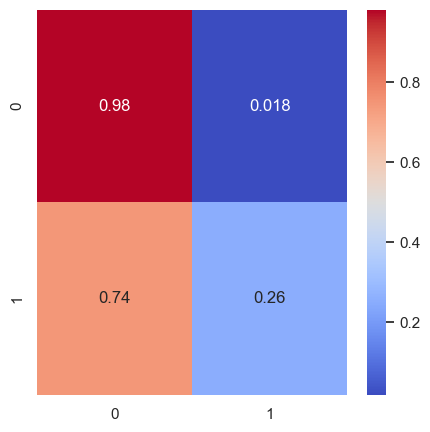

In [137]:
# try SVM
from sklearn.svm import SVC
svc = SVC(kernel = "rbf")
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1], normalize='true')
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='coolwarm')



### Decision Tree

<AxesSubplot:>

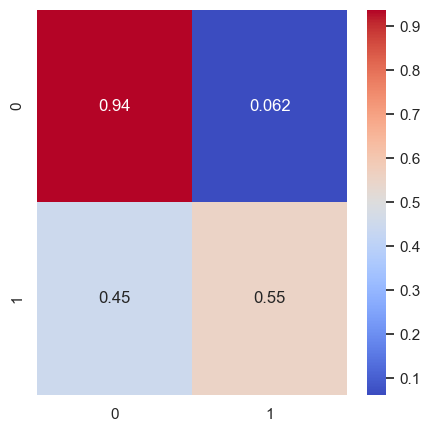

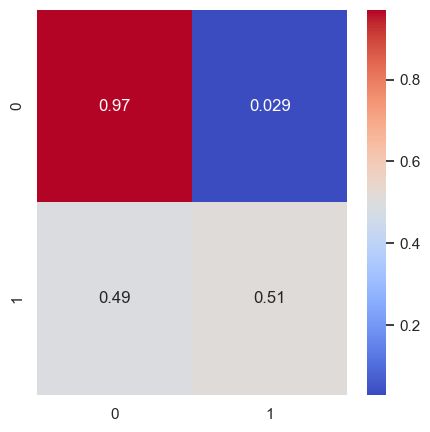

In [150]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1], normalize='true')
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='coolwarm')

# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1], normalize='true')
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='coolwarm')


In [151]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer


accuracy_macro = make_scorer(accuracy_score, average='macro')

In [161]:
# Grid Search for random forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# process bar for grid search
from tqdm import tqdm
tqdm.pandas()
rf = RandomForestClassifier(random_state=42, class_weight="balanced")
CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3, n_jobs=-1, scoring="balanced_accuracy", verbose=5)
CV_rfc.fit(X_train, y_train)

# print best parameters
print(CV_rfc.best_params_)

# print best score
print(CV_rfc.best_score_)



Fitting 3 folds for each of 150 candidates, totalling 450 fits
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 100}
0.7928220789100123


<AxesSubplot:>

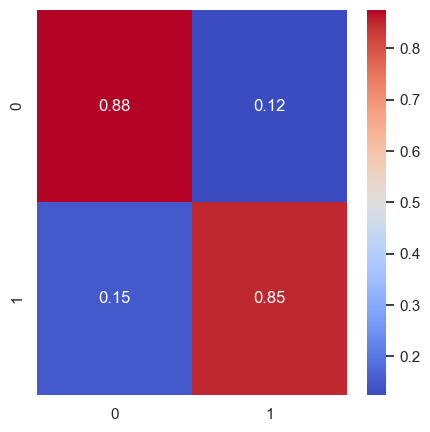

In [163]:
# train with best parameters
rf = RandomForestClassifier(n_estimators=CV_rfc.best_params_['n_estimators'], max_features=CV_rfc.best_params_['max_features'], max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'], random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1], normalize='true')
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='coolwarm')

In [158]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [189]:
# calculate class weights
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes= np.unique(y_train),y= y_train)
# form a dictionary np.unique(y_train) as key, class_weights as value
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.5766456266907124, 1: 3.761764705882353}

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normalizat  (None, 11)               23        
 ion)                                                            
                                                                 
 dense_24 (Dense)            (None, 64)                768       
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________
Epoch 1/100
32/32 - 1s - loss: 0.6169 - accuracy: 0.5904 - val_loss: 0.6530 - val_accuracy: 0.6914 - 1s/epoch - 43ms/

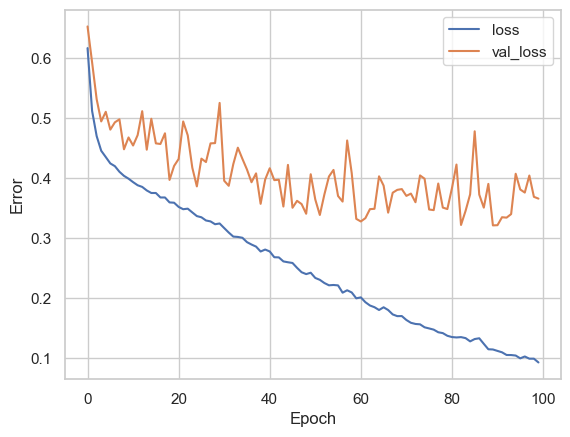

In [190]:
### Converlutional Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# normalize data
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

# build model
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile model
# use balanced accuracy as metric
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"])
model.summary()

# train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    verbose=2,
    class_weight=class_weights
)

# plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)  

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_21 (Normaliza  (None, 11)               23        
 tion)                                                           
                                                                 
 dense_61 (Dense)            (None, 64)                768       
                                                                 
 dense_62 (Dense)            (None, 64)                4160      
                                                                 
 dense_63 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________
Epoch 1/60
26/26 - 1s - loss: 0.6616 - accuracy: 0.3851 - val_loss: 0.6434 - val_accuracy: 0.6641 - 1s/epoch - 51ms/

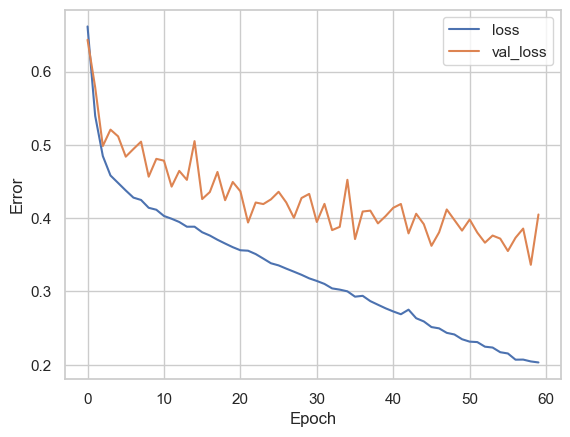

In [213]:
### Neural Network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing



# normalize data
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

# build model
model = keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile model
# use balanced accuracy score
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"])
model.summary()

# train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=40,
    epochs=60,
    verbose=2,
    class_weight=class_weights
)

# plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)  

10/10 [==============================] - 0s 1ms/step


<AxesSubplot:>

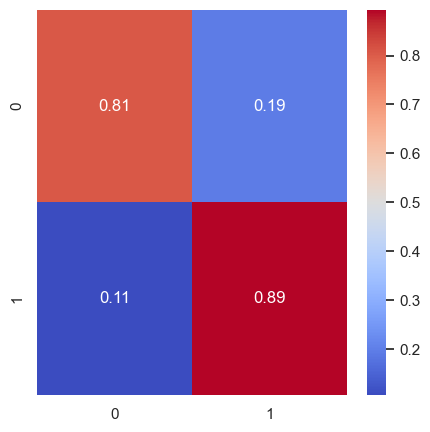

In [215]:
# print confusion matrix
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
cm = confusion_matrix(y_test, y_pred, labels=[0,1], normalize='true')
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='coolwarm')


In [169]:
keras.utils.custom_object_scope

keras.saving.object_registration.CustomObjectScope